In [58]:
import numpy as np

import keras
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import mnist

import matplotlib.pyplot as plt
%matplotlib inline

print (keras.__version__)

2.0.4


In [66]:
ipt = Input(shape=(28*28, ))
encoded = Dense(128, activation='relu')(ipt)
encoded = Dense(32, activation='relu')(encoded) #activity_regularizer=regularizers.l1(10e-5)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(28*28, activation='sigmoid')(decoded)
auto_encoder_fc = Model(ipt, decoded)
auto_encoder_fc.compile(optimizer='adadelta', loss='binary_crossentropy')
auto_encoder_fc.summary()

encoder_fc = Model(ipt, encoded)

# decoder needs a new Input()
d_ipt = Input(shape=(32,))
# decoded is a 'value' while auto_encoder_fc.layers[-1] is a layer
d1, d2 = auto_encoder_fc.layers[-1], auto_encoder_fc.layers[-2]
decoder_fc = Model(d_ipt, d1(d2(d_ipt)))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_24 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_25 (Dense)             (None, 128)               4224      
_________________________________________________________________
dense_26 (Dense)             (None, 784)               101136    
Total params: 209,968
Trainable params: 209,968
Non-trainable params: 0
_________________________________________________________________


In [67]:
ipt = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), strides=1, activation='relu', padding='same')(ipt)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), strides=1, activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)


x = Conv2D(8, (3, 3), strides=1, activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), strides=1, activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), strides=1, activation='relu', padding='same')(x)

auto_encoder_conv = Model(ipt, decoded)
auto_encoder_conv.compile(optimizer='adadelta', loss='binary_crossentropy')
auto_encoder_conv.summary()

encoder_conv = Model(ipt, encoded)

# decoder needs a new Input()
ipt = Input(shape=(7,7,8))
# decoded is a 'value' while auto_encoder_fc.layers[-1] is a layer
decoded = auto_encoder_conv.layers[-5](ipt)
decoded = auto_encoder_conv.layers[-4](decoded)
decoded = auto_encoder_conv.layers[-3](decoded)
decoded = auto_encoder_conv.layers[-2](decoded)
decoded = auto_encoder_conv.layers[-1](decoded)
decoder_conv = Model(ipt, decoded)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 14, 14, 8)         2312      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d_9 (UpSampling2 (None, 14, 14, 8)         0         
__________

In [55]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape((-1, 28*28))
x_test = x_test.reshape((-1, 28*28))

auto_encoder_fc.fit(x_train, x_train, epochs=4, batch_size=128, verbose=1, shuffle=True, 
                 validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 12s - loss: 0.2953 - val_loss: 0.2433
Epoch 2/4
60000/60000 [==============================] - 11s - loss: 0.2151 - val_loss: 0.1962
Epoch 3/4
60000/60000 [==============================] - 11s - loss: 0.1871 - val_loss: 0.1763
Epoch 4/4
60000/60000 [==============================] - 10s - loss: 0.1695 - val_loss: 0.1605


In [71]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

auto_encoder_conv.fit(x_train, x_train, epochs=1, batch_size=128, verbose=1, shuffle=True, 
                 validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 230s - loss: 0.1806 - val_loss: 0.1318


In [74]:
def draw(i, encoder, decoder):
    img = x_test[i]
    img_encoded = encoder.predict(np.expand_dims(img, axis=0))
    img_decoded = decoder.predict(img_encoded)
    
    _, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(img.reshape((28,28)))
    ax2.imshow(img_decoded.reshape((28,28)))

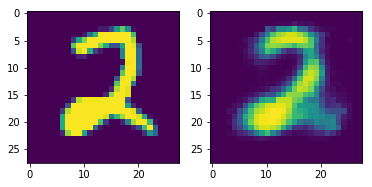

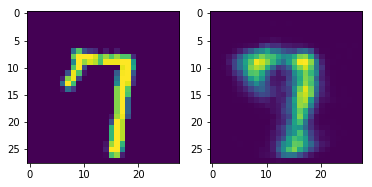

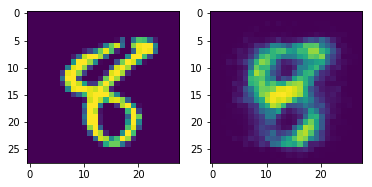

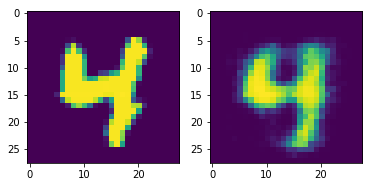

In [57]:
for i in range(82, 86):
    draw(i, encoder_fc, decoder_fc)

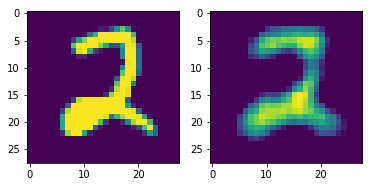

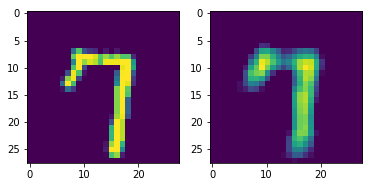

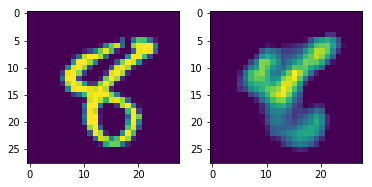

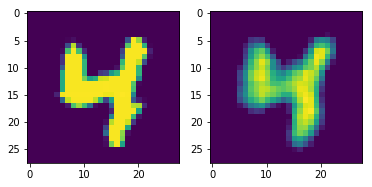

In [75]:
for i in range(82, 86):
    draw(i, encoder_conv, decoder_conv)